<a href="https://colab.research.google.com/github/Lor3nzoVis3/DeepLearning_ProjectLV_GB/blob/master/FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
@author: LorenzoVisentini
"""
modelName = "FromScratch"


#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image  import ImageDataGenerator

# from sklearn.model_selection import train_test_split
#keras
# import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, MaxPooling2D, Dropout
from keras.models import Model, Sequential
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Images parameters
img_width = 178 
img_height = 218
shape = (img_height, img_width)

# train_dir = './source_light/training'
# validation_dir = './source_light/validation' 
train_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/train'
validation_dir = '/content/drive/My Drive/Deep Learning Project - Image Classification/orient/valid' 

batch_size = 64
epochs = 10
convDepth = 16
dropRate = 0.7

In [ ]:
#model
model = Sequential()

model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu', input_shape=shape))
model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(dropRate))

model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
model.add(Conv2D(convDepth, kernel_size = (3,3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(dropRate))

model.add(Conv2D(convDepth*2, kernel_size = (5,5), activation= 'relu'))
model.add(Conv2D(convDepth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(dropRate))

model.add(Conv2D(convDepth*2, kernel_size = (5,5), activation= 'relu'))
model.add(Conv2D(convDepth*2, kernel_size = (5,5), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))
model.add(Dropout(dropRate))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation= 'softmax'))

In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',  #because we have 3 possible outputs
              metrics = ['accuracy'])

In [ ]:
#preprocessing
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_height, img_width),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

val_generator = datagen.flow_from_directory(directory=validation_dir,
                                                    target_size=(img_height, img_width),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

Found 8383 images belonging to 3 classes.
Found 1811 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(generator = train_generator,
                             steps_per_epoch = train_generator.n//batch_size,
                             epochs = epochs,
                             validation_data = val_generator,
                             validation_steps=val_generator.n//batch_size
                             )

Epoch 1/10
130/130 [==============================] - 27s 211ms/step - loss: 0.9905 - accuracy: 0.5792 - val_loss: 0.9201 - val_accuracy: 0.6055
Epoch 2/10
130/130 [==============================] - 27s 207ms/step - loss: 0.5556 - accuracy: 0.7787 - val_loss: 0.8464 - val_accuracy: 0.6261
Epoch 3/10
130/130 [==============================] - 27s 210ms/step - loss: 0.4779 - accuracy: 0.8084 - val_loss: 0.5965 - val_accuracy: 0.7232
Epoch 4/10
130/130 [==============================] - 27s 208ms/step - loss: 0.4219 - accuracy: 0.8299 - val_loss: 0.5085 - val_accuracy: 0.8019
Epoch 5/10
130/130 [==============================] - 27s 207ms/step - loss: 0.4049 - accuracy: 0.8383 - val_loss: 0.5686 - val_accuracy: 0.7595
Epoch 6/10
130/130 [==============================] - 27s 207ms/step - loss: 0.3988 - accuracy: 0.8365 - val_loss: 0.6055 - val_accuracy: 0.7679
Epoch 7/10
130/130 [==============================] - 27s 208ms/step - loss: 0.3896 - accuracy: 0.8458 - val_loss: 0.4606 - val_ac

In [ ]:
#save model and history
file_model = '/content/drive/My Drive/Deep Learning Project - Image Classification/Models/'+ 'FaceOrientation' + modelName + '_Dropout'+ str(dropRate) + '_' + str(batch_size) + '_' + str(epochs) + '_' + str(convDepth)
model.save(file_model + '.h5')
print(file_model)
#save history
file_hist = '/content/drive/My Drive/Deep Learning Project - Image Classification/History/'+ 'FaceOrientation' + modelName + '_Dropout'+ str(dropRate) + '_' + str(batch_size) + str(epochs) + '_' + str(convDepth) + '.csv'
df_history = pd.DataFrame(history.history)
with open(file_hist, 'w') as file:
    df_history.to_csv(file)

/content/drive/My Drive/Deep Learning Project - Image Classification/Models/FaceOrientationFromScratch_Dropout0.7_64_10_16


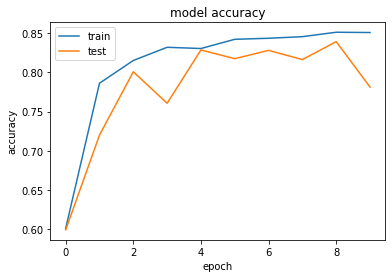

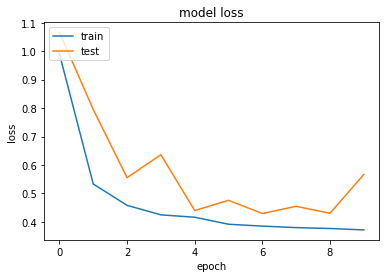

In [ ]:
#plot results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluation
# https://stackoverflow.com/questions/40564936/keras-what-is-the-difference-between-model-evaluate-generator-and-model-predict
steps = val_generator.n // val_generator.batch_size

accuracy_ontest = model.evaluate_generator(val_generator, steps)
predictions_ontest = model.predict_generator(val_generator, steps)
print(accuracy_ontest)
print(predictions_ontest)

[0.5681671500205994, 0.7801339030265808]
[[9.8549992e-01 1.2812923e-02 1.6871827e-03]
 [9.6882105e-01 2.9962994e-02 1.2159452e-03]
 [9.4868684e-01 5.2116010e-03 4.6101529e-02]
 ...
 [5.3691190e-01 4.6215317e-01 9.3489233e-04]
 [9.6647537e-01 2.9924531e-02 3.6000514e-03]
 [9.6090108e-01 3.5115849e-02 3.9830389e-03]]
